In [33]:
import pandas as pd

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

from sklearn import metrics

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

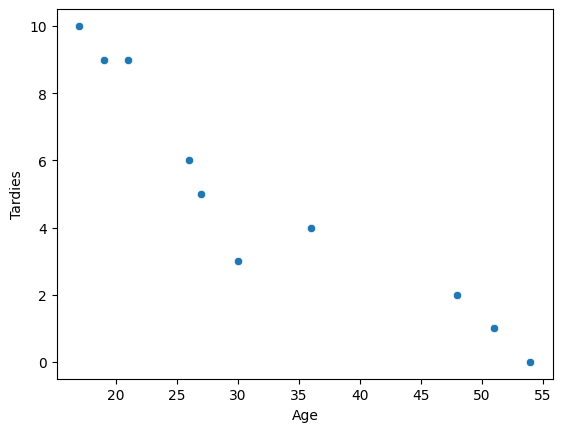

In [4]:
# Your code here.
import seaborn as sns
sns.scatterplot(data = student_data, x = 'Age', y = 'Tardies')


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

# When age increase the number of tardies decrease
# One in the influence on the other in a negative way, younger (smaller age) the times of tardies increase 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
student_data.corr()


,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
# correlation of -0.939
# scatterplot: negative (goes down) tendency

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
# 1. Create an equation that draws a line
lr = LinearRegression() 
lr 

LinearRegression()

In [9]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [22]:
# 2. FIT the model to my data: draw the line so it accomodates MY datapoints

X = student_data[["Age"]]
Y = student_data[["Tardies"]]

lr.fit(X, Y) 

LinearRegression()

In [11]:
# Print the coefficients of the linear regression model
lr.coef_

array([[-0.24282077]])

In [12]:
# Print the intercept of the linear regression model
lr.intercept_

array([12.88880336])

In [32]:
# with this i can make the equation

# Tardies = (Coefficient * Age) + Intercept
# Tardies = (-0.24282077* Age) + 12.88880336

#This is the coefficient of the independent variable (Age in this case).

with this i can make the equation

Tardies = (Coefficient * Age) + Intercept

Tardies = (-0.24282077* Age) + 12.88880336

### lr.coef_ (Coefficient):
**The value obtained is -0.24282077.**
- This is the coefficient of the independent variable (Age in this case).
- In the context of a simple linear regression model, this represents the slope of the regression line. 
- It indicates how much the dependent variable (Tardies) is expected to change for a one-unit change in the independent variable (Age).

### lr.intercept_ (Intercept):
**The value obtained is 12.88880336.**
- This is the intercept of the linear regression model.
- It represents the value of the dependent variable (Tardies) when the independent variable (Age) is zero.

Plot your regression model on your scatter plot.

In [16]:
# Calculate and store the predicted values in the "prediction" column
student_data["prediction"] = X * lr.coef_[0] + lr.intercept_

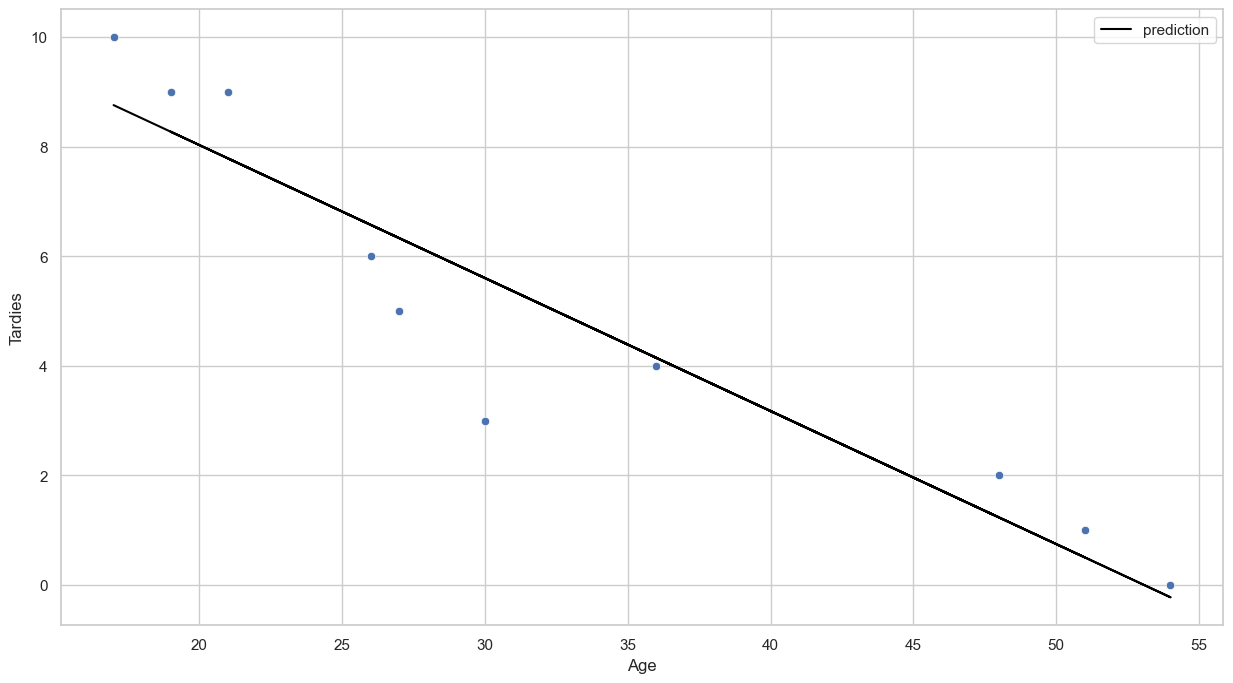

In [26]:
# Create a scatter plot of the original data points
sns.scatterplot(x= student_data["Age"], y= student_data["Tardies"])
# Overlay the linear regression prediction line on the plot
plt.plot(student_data["Age"], student_data["prediction"], c="black", label="prediction")
# Display the legend
plt.legend();

In [30]:
# Calculate the mean absolute error (MAE) of the predictions
student_data["error_prediction"] = (student_data['Tardies'] - student_data["prediction"]).abs()
student_data["error_prediction"].mean()

0.9319083427082718

### mean absolute error (MAE)

- Is a metric used to evaluate the performance of a regression model. It measures the average absolute difference between the actual values and the predicted values. 
**MAE = 0.9319...**
- The MAE is a measure of the average absolute difference between the actual and predicted values.
- In this context (predicting "Tardies" based on "Age"), a MAE of 0.9319 means that, on average, our model's predictions are off by approximately 0.9319 units of "Tardies" from the actual values.
- A lower MAE indicates better model performance
- **Interpretation of MAE: On average, our model's predictions are off by approximately 0.9319 units of "Tardies."**


### MAE Good or Bad
**MAE of 0:**
- An MAE of 0 would mean that your model's predictions are perfect and exactly match the true values. In practice, achieving a MAE of 0 is rare and may indicate overfitting or some other issue.
**Low MAE:**
-  low MAE indicates that, on average, your model's predictions are close to the true values. What is considered "low" depends on the scale of your target variable. For example, if you are predicting house prices and the prices are in the range of thousands of dollars, a MAE of 100 may be considered low.
**No Threshold**



In [31]:
# Predict the "Tardies" value for a new data point with an "Age" of 35
lr.predict([[35]])

c:\Users\anafl\miniconda3\envs\ironhack\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4.39007638]])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [35]:
# Calculate R-squared (coefficient of determination)
r2 = metrics.r2_score(student_data['Tardies'], student_data['prediction'])
r2

0.8820265558250109

- Interpretation of R-squared: R-squared measures the proportion of the variance in the dependent variable ("Tardies") that is explained by the independent variable ("Age").
- An R-squared of 0.8820 suggests that approximately 88.20% of the variance in tardiness can be explained by the linear relationship with age.
- This is a relatively high R-squared value, indicating that age is a strong predictor of tardiness in our model.

**Conclusion: Age appears to be a good predictor of tardiness based on the high R-squared value.**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
# Import any libraries you may need & the data

data = pd.read_csv("../lab-regression-analysis/vehicles.csv")
data

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [41]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [39]:
# dependant variable (y): one series - CO2 Emission Grams/Mile
# independant variables (x): more than one variable - Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year

In [46]:
subset = data[["CO2 Emission Grams/Mile", "Year", "Cylinders", 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
subset.corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


- The variable with more impact is the column 'Fuel Barrels/Year'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [48]:
# Your response here. 
# 1. X, y: 
X = data[["Year", "Cylinders", 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = data[['CO2 Emission Grams/Mile']]

# 2. Choose a model: lr
lr = LinearRegression() # Instantiating the model -> draw a straight line

# 3. Fit
lr.fit(X, Y) # Draw the straight line based on this data

# 4. Metrics
print(lr.intercept_) 
print(lr.coef_) 

[769.88828365]
[[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [49]:
# 1. X, y: 
X = data[["Year", "Cylinders", 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = data[['CO2 Emission Grams/Mile']]

# 2. Choose a model: lr & fit
results = smf.ols('Q("CO2 Emission Grams/Mile") ~ Q("Year") + Q("Cylinders") + Q("Fuel Barrels/Year") + Q("Combined MPG") + Q("Fuel Cost/Year")', data = data).fit()

# 3. Metrics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q("CO2 Emission Grams/Mile")   R-squared:                       0.981
Model:                                      OLS   Adj. R-squared:                  0.981
Method:                           Least Squares   F-statistic:                 3.687e+05
Date:                          Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                                  16:56:48   Log-Likelihood:            -1.5173e+05
No. Observations:                         35952   AIC:                         3.035e+05
Df Residuals:                             35946   BIC:                         3.035e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                769.8883     19.392     39.702      0.000     731.880     807.897
Q("Year")                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Q("Cylinders")             1.8788      0.083     22.598      0.000       1.716       2.042
Q("Fuel Barrels/Year")    19.0529      0.061    311.600      0.000      18.933      19.173
Q("Combined MPG")         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Q("Fuel Cost/Year")        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 